# 이분탐색
이진탐색이란 정렬된 배열에서 반씩 쪼개 가며 정해진 값을 찾는 것


---


## 팁
1. 데이터개수가 1000만개, 탐색 범위 크기가 1000억 이상이면 이분 탐색을 사용해야 하는 경우가 많음

(트리를 구현하는 문제는 잘 나오지 않음)

2. input을 받을 데이터개수가 많을 때


```
import sys 
input=sys.stdin.readline().rstrip()


#readline() #엔터로 줄 바꿈
# rstrip() #공백 문자를 제거해줌
```


3. 손코딩하는 문제를 내는 회사에서 이분탐색 코드를 작성하라고 많이 나온다.

반복하면서 암기 해야 하는 부분이다.

# 프로그래머스 입국심사
### 문제 설명
n명이 입국심사를 위해 줄을 서서 기다리고 있습니다. 각 입국심사대에 있는 심사관마다 심사하는데 걸리는 시간은 다릅니다.

처음에 모든 심사대는 비어있습니다. 한 심사대에서는 동시에 한 명만 심사를 할 수 있습니다. 가장 앞에 서 있는 사람은 비어 있는 심사대로 가서 심사를 받을 수 있습니다. 하지만 더 빨리 끝나는 심사대가 있으면 기다렸다가 그곳으로 가서 심사를 받을 수도 있습니다.

모든 사람이 심사를 받는데 걸리는 시간을 최소로 하고 싶습니다.

입국심사를 기다리는 사람 수 n, 각 심사관이 한 명을 심사하는데 걸리는 시간이 담긴 배열 times가 매개변수로 주어질 때, 모든 사람이 심사를 받는데 걸리는 시간의 최솟값을 return 하도록 solution 함수를 작성해주세요.

### 제한사항
입국심사를 기다리는 사람은 1명 이상 1,000,000,000명 이하입니다.
각 심사관이 한 명을 심사하는데 걸리는 시간은 1분 이상 1,000,000,000분 이하입니다.
심사관은 1명 이상 100,000명 이하입니다.

### 입출력 예
n	times	return

6	[7, 10]	28

### 입출력 예 설명
가장 첫 두 사람은 바로 심사를 받으러 갑니다.

7분이 되었을 때, 첫 번째 심사대가 비고 3번째 사람이 심사를 받습니다.
10분이 되었을 때, 두 번째 심사대가 비고 4번째 사람이 심사를 받습니다.
14분이 되었을 때, 첫 번째 심사대가 비고 5번째 사람이 심사를 받습니다.
20분이 되었을 때, 두 번째 심사대가 비지만 6번째 사람이 그곳에서 심사를 받지 않고 1분을 더 기다린 후에 첫 번째 심사대에서 심사를 받으면 28분에 모든 사람의 심사가 끝납니다.

In [ ]:
# 왜 이진탐색이지?
# 끝나는 시간을 나타내서, 끝나는 시간이 제일 적을 때 거기부터 채운다.

# 3, 5, 7
# 사람 8명
# 0: 3(1),    5(2),    7(3)
# 3: 3(1->4), 5(2),    7(3)
# 5: 3(4),    5(2->5), 7(3)
# 6: 3(4->6), 5(5),    7(3)
# 7: 3(6),    5(5),    7(3->7)
# 9: 3(6->8), 5(5),    7(7)
# 10:3(8),    5(),     7(7)
# 12:3(8->9), 5(),     7() 

# cnt를 어떻게 하냐?
# 각 걸리는 시간을 인원 수 만큼 곱해서 sort
# 끝난 사람을 cnt
# [0, 3(1), 5(2), 6(3), 7(4), 8(5), 10(6), 12(7)]

# 첫번째 풀이
# 각 for loop으로 times * n 까지 해서 경우의 수를 뽑는다.
# 각 경우의 수에서 사람 수 indexing하면 된다.
# 문제 : 최대 경우 1000만 * 1000만 너무 커진다. (4~9까지 시간초과)
def solution(n, times):
    times.sort()
    cases = []

    for time in times : 
        for i in range(1, n+1, 1) : 
            cases.append(time*i)

    print(cases)

    answer = sorted(cases)[n-1]

    return answer

solution(6, [7,10])

[7, 14, 21, 28, 35, 42, 10, 20, 30, 40, 50, 60]


28

In [ ]:
# 두번째 풀이
# 기준 : 정렬 후 n개 보다 크면 for 문을 나와준다.
# 4~9 시간초과
def solution(n, times):
    times.sort()
    cases = []
    tmp = n*times[0] + 1

    for time in times : 
        for i in range(1, n+1, 1) : 
            if time*i < tmp :
                cases.append(time*i)
            else : break
        tmp = sorted(cases)[n-1]
    print(cases)

    return tmp
solution(6, [7,10])

[7, 14, 21, 28, 35, 42, 10, 20, 30, 40]


28

In [ ]:
# 풀이
# 심사시간의 경우의 수가 이분 탐색의 대상이 된다.
# https://kdgt-programmer.tistory.com/60

# 스스로 풀어보기!(화요일날!)
def solution(n, times) : 
    left, right = 1, min(times)*n

    answer = 0
    while left <= right :
        cnt_n = 0
        mid   = (left + right) // 2
        for time in times : 
            cnt_n += mid // time
            if cnt_n >= n :
                answer = mid
                right = mid - 1
                break
        if cnt_n < n :
            left = mid + 1

    return answer
solution(3, [1,5])

before
1 3
before
3 3


3

In [14]:
# 소요시간을 이분탐색의 대상으로
# left 최소값 1
# answer 값을 따로 저장해주는 이유
# right, left mid+-1로 하므로 초반 mid가 정답일 때의 케이스를 저장하기 위해 - 아래 사진 참고
def solution(n, times) : 
    left  = 1
    right = min(times)*n

    while left <= right :     # 이진 탐색 최악 경우
        cnt_n = 0
        mid   = (left+right) // 2
        for time in times :
            cnt_n += mid // time
            # cnt_n이 커도 
            if cnt_n >= n :       # 중간에 맞춘 경우
                answer = mid
                right  = mid - 1
                break
        if cnt_n < n :
            left = mid + 1

    return answer

solution(3, [7, 19])

18

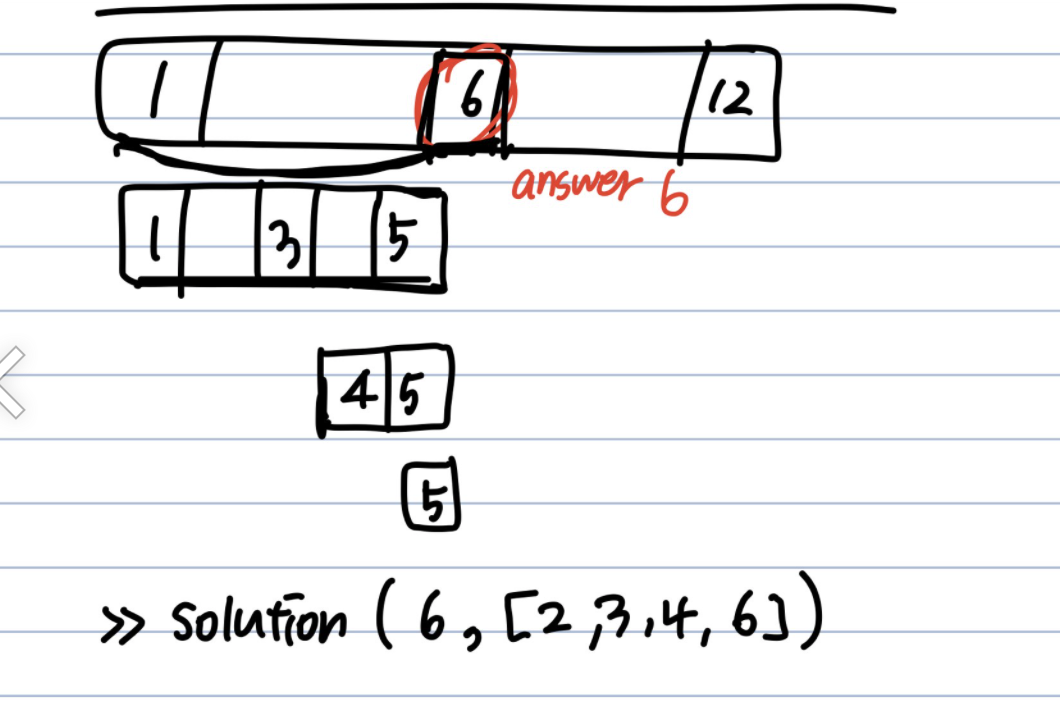

# 프로그래머스 징검다리
https://programmers.co.kr/learn/courses/30/lessons/43236?language=python3
### 문제 설명
출발지점부터 distance만큼 떨어진 곳에 도착지점이 있습니다. 그리고 그사이에는 바위들이 놓여있습니다. 바위 중 몇 개를 제거하려고 합니다.
예를 들어, 도착지점이 25만큼 떨어져 있고, 바위가 [2, 14, 11, 21, 17] 지점에 놓여있을 때 바위 2개를 제거하면 출발지점, 도착지점, 바위 간의 거리가 아래와 같습니다.

제거한 바위의 위치	각 바위 사이의 거리	거리의 최솟값

[21, 17]	[2, 9, 3, 11]	2

[2, 21]	[11, 3, 3, 8]	3

[2, 11]	[14, 3, 4, 4]	3

[11, 21]	[2, 12, 3, 8]	2

[2, 14]	[11, 6, 4, 4]	4

위에서 구한 거리의 최솟값 중에 가장 큰 값은 4입니다.

출발지점부터 도착지점까지의 거리 distance, 바위들이 있는 위치를 담은 배열 rocks, 제거할 바위의 수 n이 매개변수로 주어질 때, 바위를 n개 제거한 뒤 각 지점 사이의 거리의 최솟값 중에 가장 큰 값을 return 하도록 solution 함수를 작성해주세요.

### 제한사항
도착지점까지의 거리 distance는 1 이상 1,000,000,000 이하입니다.

바위는 1개 이상 50,000개 이하가 있습니다.

n 은 1 이상 바위의 개수 이하입니다.

###입출력 예
distance	rocks	n	return

25	[2, 14, 11, 21, 17]

In [18]:
# 왜 이것도 이분탐색 인거?
# 각 거리와 돌에 대한 거리를 return
# 최소값부터 더해줌(양쪽 중 작은 것으로 합치기)
# 결과 : 테스트 4, 7 실패
def solution(distance, rocks, n): 
    dist_beetween = []

    rocks.extend([0, distance])
    rocks.sort()
    for i in range(len(rocks[:-1])) : 
        dist_beetween.append(abs(rocks[i]-rocks[i+1]))            


    # min 찾고 합치기 & 맨 앞, 뒤일 때는 무조건 앞 뒤로
    for _ in range(n) : 
        min_dist = min(dist_beetween)
        min_idx  = dist_beetween.index(min_dist)

        if min_idx == 0 or dist_beetween[min_idx-1] >= dist_beetween[min_idx+1] :
            dist_beetween[min_idx+1] += min_dist
            del dist_beetween[min_idx]

        elif min_idx == len(dist_beetween) or dist_beetween[min_idx-1] < dist_beetween[min_idx+1] :
            dist_beetween[min_idx-1] += min_dist
            del dist_beetween[min_idx]

    #print(dist_beetween)
    answer = min(dist_beetween)
    return answer

solution(10000000, [123123, 1141, 1142, 1143, 17, 18], 4)

1143

In [30]:
# https://m.post.naver.com/viewer/postView.nhn?volumeNo=27217004&memberNo=33264526
# 이분탐색! -> 답을 주어 탐색 후에 이분 탐색의 대상을 조정한다.
# 이분 탐색의 대상 : 돌 사이의 거리
# 시작 0~distance로 두어
# 삭제된 돌의 개수가 n보다 많으면 기준 거리 감소(right = mid+1)
# 삭제된 돌의 개수가 n보다 적으면 기준 거리 증가(left  = mid-1)
def solution(distance, rocks, n): 
    left, right = 1, distance
    rocks.sort()
    rocks.append(distance)

    while left <= right :
        mid       = (left+right) // 2
        
        min_dist  = distance
        prev      = 0
        cnt       = 0

        for rock in rocks : 
            if rock-prev < mid :
                cnt += 1
            else : 
                min_dist = min(min_dist, rock-prev)
                prev = rock
  
        if cnt > n : 
            right  = mid-1
        else : 
            answer = min_dist
            left   = mid+1


        # 내가 푼거 -> 틀림
        # 이유 : 삭제된 돌의 개수가 더 많을 경우 min_dist가 더 클 수 있음
        # 이분탐색 answer의 경우 그 케이스가 더 많아지는 경우로는 안댐
        #if cnt >= n : 
        #    t_answer = min_dist
        #    right  = mid-1
        #else : 
        #    left   = mid+1
        
    return answer
solution(20, [5], 1)

20